In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Administrator/Desktop/Principles_of_data_science_Assignment-1/Question_2_Student_performance/data_clean/cleaned_studentsPerformance.csv")

In [4]:
parent_education_levels = data["parental level of education"].unique()


In [5]:
print(parent_education_levels)

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [19]:
# Define the order of parental education levels
parent_edu_order = ["master's degree","bachelor's degree",  "associate's degree",'some college',  'high school', 'some high school']


In [20]:
# Filter the data to include only the specified parental education levels
df_filtered = data[data["parental level of education"].isin(parent_edu_order)]

In [21]:
# Calculate the count of students by race/ethnicity and parental education level
counts = df_filtered.groupby(["parental level of education", "race/ethnicity"]).size().unstack(fill_value=0)

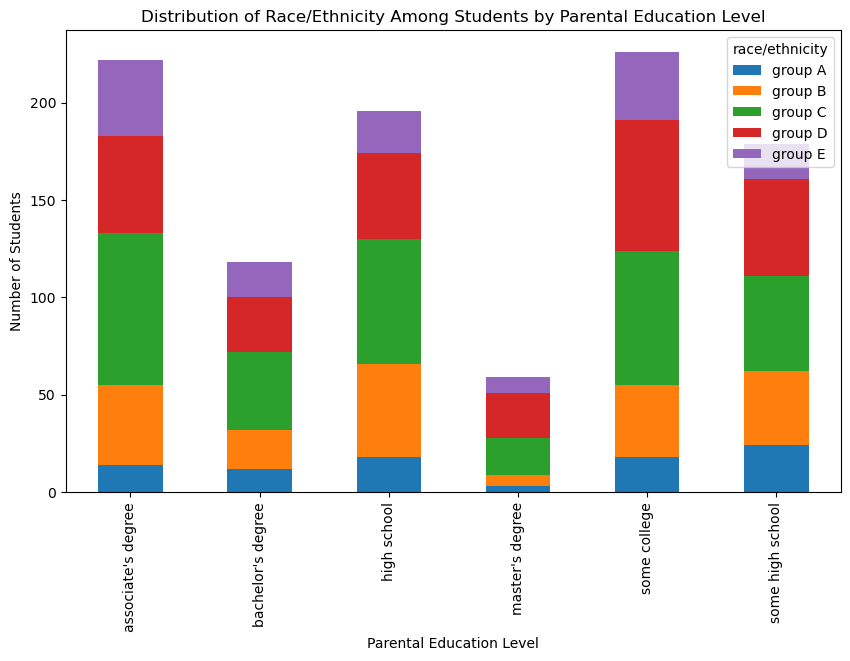

In [18]:
# Plot the stacked bar chart
counts.plot(kind="bar", stacked=True, figsize=(10, 6))

#Students whose parental education is masters degree  is least and bachelor's degree is second least
#Group D parents has highest percentage of masters degree compared to other groups 




In [26]:
()# Filter the data to include only students whose parents have a bachelor's degree
df_bachelors = data[data['parental level of education'] == "bachelor's degree"]

In [27]:
# Calculate the number of students in each racial group
race_counts = df_bachelors['race/ethnicity'].value_counts()

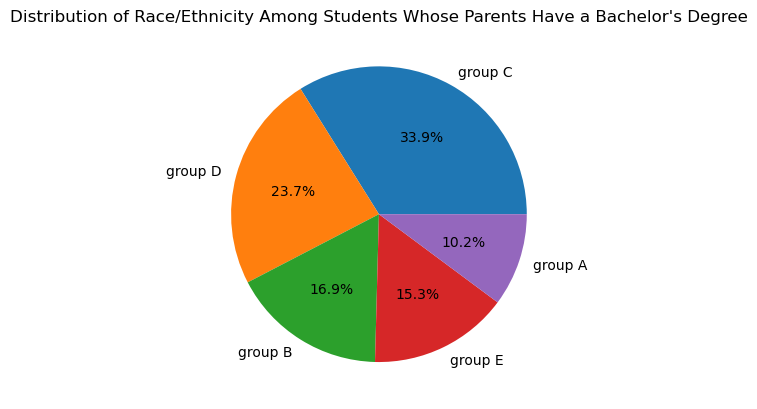

In [28]:
# Create a pie chart
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Race/Ethnicity Among Students Whose Parents Have a Bachelor's Degree")
plt.show()

# Group C  parents has highest percentage of bachelor's degree

In [29]:
# Filter the data to include only students whose parents have a master's degree
df_masters = data[data['parental level of education'] == "master's degree"]


In [30]:
# Calculate the number of students in each racial group
race_counts = df_masters['race/ethnicity'].value_counts()

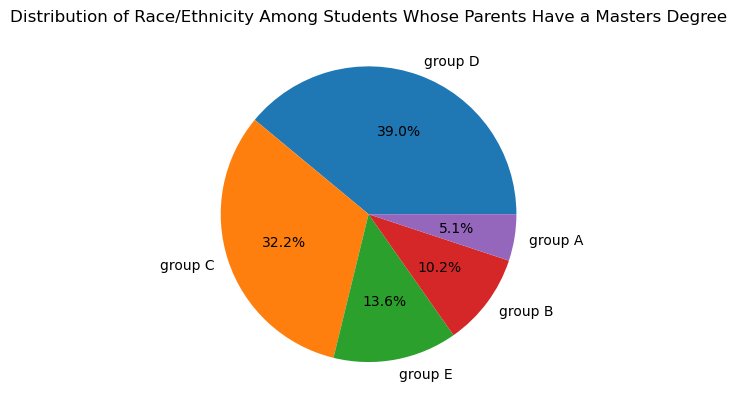

In [31]:
# Create a pie chart
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Race/Ethnicity Among Students Whose Parents Have a Masters Degree")
plt.show()

#GROUP D parents  has highest percentage of masters degree

In [39]:
# Calculate the average scores by race and gender
avg_scores = data.groupby(['race/ethnicity', 'gender'])[['math score', 'reading score', 'writing score']].mean()

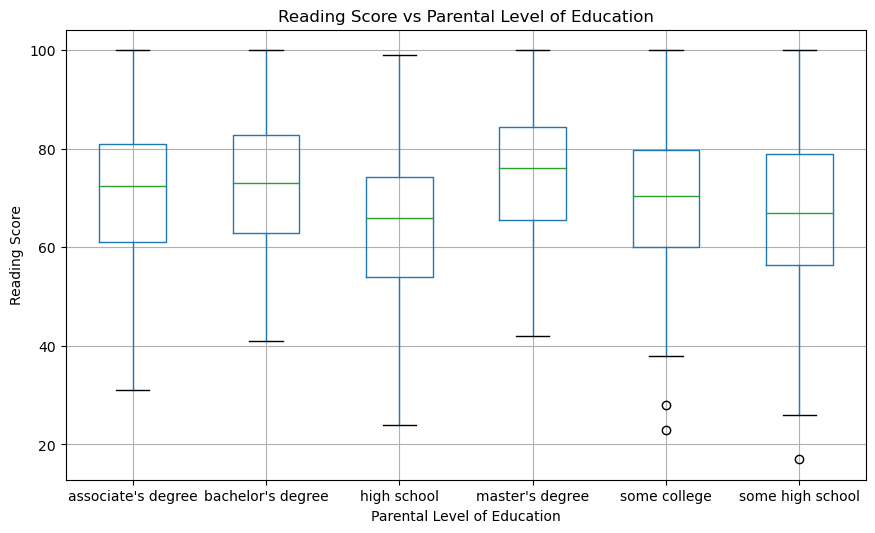

In [40]:
# Create a box plot of reading score by parental level of education
data.boxplot(column='reading score', by='parental level of education', figsize=(10, 6))
plt.title('Reading Score vs Parental Level of Education')
plt.suptitle('')  # Remove the default title generated by pandas
plt.xlabel('Parental Level of Education')
plt.ylabel('Reading Score')
plt.show()
# Observation :The Reading Score of the student doesn't depend upon the  Parental Level of Education

In [41]:
# Calculate the average scores by race and gender
avg_scores = data.groupby(['race/ethnicity', 'gender'])[['math score', 'reading score', 'writing score']].mean()

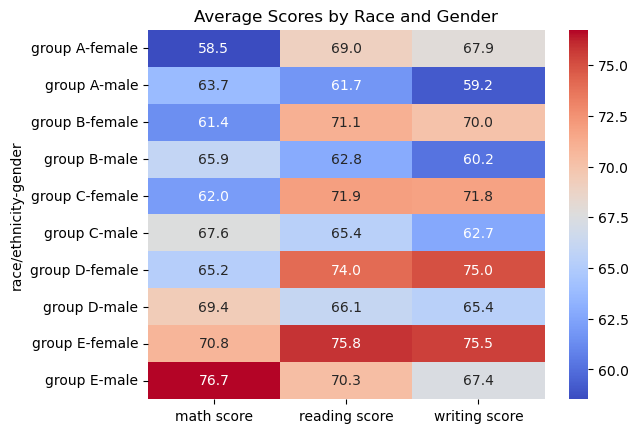

In [42]:
# Create a heatmap of the average scores
sns.heatmap(avg_scores, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Scores by Race and Gender')
plt.show()
# Observation:The average Math Score is highest in Group E male and Group E female scored highest in Reading and Writing

In [43]:
math_counts = data.groupby(['gender', pd.cut(data['math score'], bins=[0, 40, 60, 80, 100])]).size().unstack()
reading_counts = data.groupby(['gender', pd.cut(data['reading score'], bins=[0, 40, 60, 80, 100])]).size().unstack()
writing_counts = data.groupby(['gender', pd.cut(data['writing score'], bins=[0, 40, 60, 80, 100])]).size().unstack()

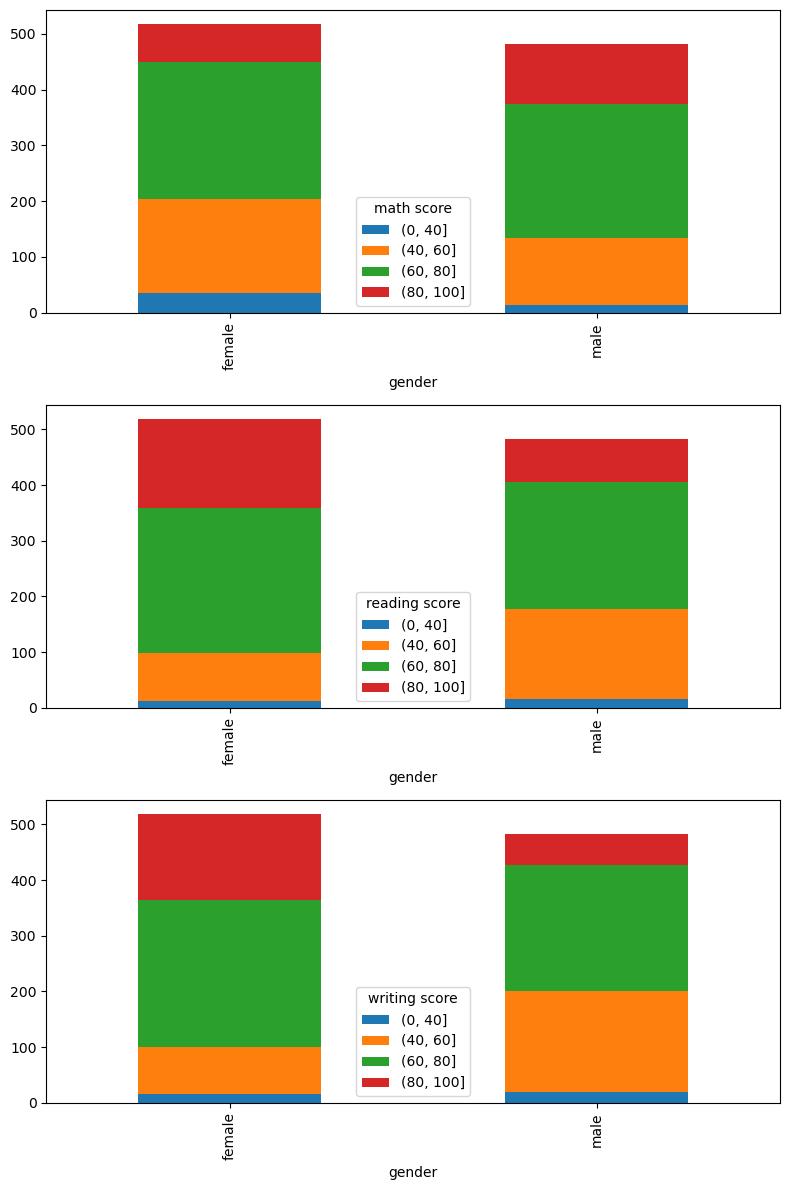

In [44]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
math_counts.plot(kind='bar', stacked=True, ax=axs[0])
reading_counts.plot(kind='bar', stacked=True, ax=axs[1])
writing_counts.plot(kind='bar', stacked=True, ax=axs[2])
plt.tight_layout()
plt.show()

#Most number of students(both male and Female) has Scored between 60-80 in Maths,Reading,Writing

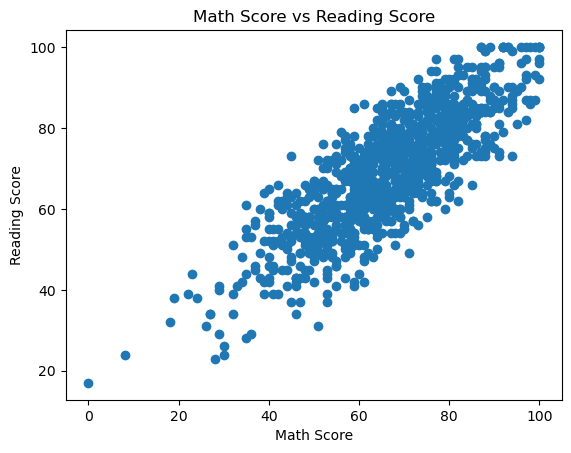

In [45]:
# Create a scatter plot of math score versus reading score
plt.scatter(data['math score'], data['reading score'])
plt.title('Math Score vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()
# The student who scored good in maths has scored good in Reading also,The divergence of maths score and reading score is not huge 

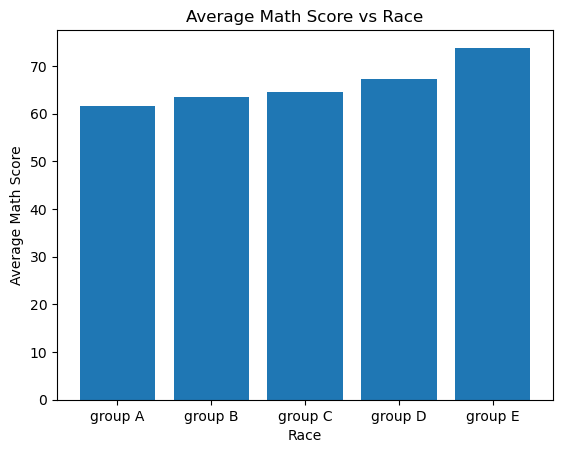

In [52]:
# Calculate the average math score for each race
avg_math_by_race = data.groupby('race/ethnicity')['math score'].mean()
# Create a bar chart of the average math score by race
plt.bar(avg_math_by_race.index, avg_math_by_race)
plt.title('Average Math Score vs Race')
plt.xlabel('Race')
plt.ylabel('Average Math Score')
plt.show()
# Observation :The average Math Score of Group E students is highest among all the groups




In [54]:
data['average score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3


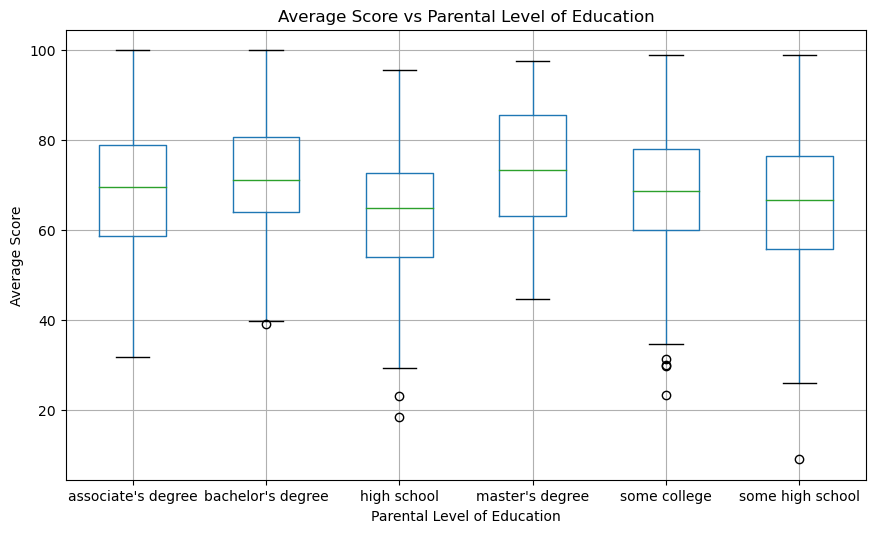

In [55]:
data.boxplot(column='average score', by='parental level of education', figsize=(10, 6))
plt.title('Average Score vs Parental Level of Education')
plt.suptitle('')  # Remove the default title generated by pandas
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.show()
# Observation :The Average Score of the student  whose  Parental Level of Education is Masters is slightly higher compared to others

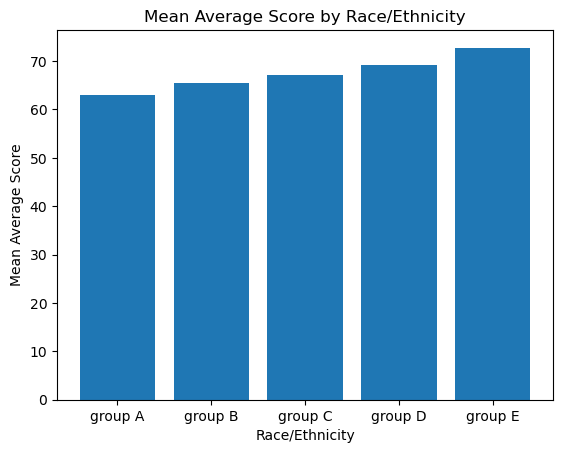

In [56]:
# Calculate the mean average score for each group
group_means = data.groupby('race/ethnicity')['average score'].mean()

# Create a bar chart of the mean average score for each group
plt.bar(group_means.index, group_means)
plt.title('Mean Average Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mean Average Score')
plt.show()

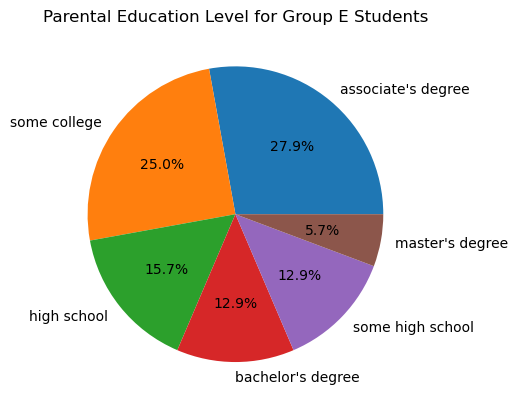

In [57]:
# Select the subset of data for group E students
group_e = data[data['race/ethnicity'] == 'group E']

# Count the frequency of each parental education level in the subset
parental_counts = group_e['parental level of education'].value_counts()

# Create a pie chart of the frequency of each parental education level
plt.pie(parental_counts, labels=parental_counts.index, autopct='%1.1f%%')
plt.title('Parental Education Level for Group E Students')
plt.show()

#Group E students average score is highest but only 5.7 percentage Group E parents having masters degree 
